# Random Number Generation

In [2]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import time as time
# this line plots graphs in line
%matplotlib inline

In [3]:
### examples in numpy and vector notation
a=np.array([0,1,2,3,4], dtype=float)
b=np.array([5,6,7,8,9], dtype=float)
print a
print b
print a*b
c=np.arange(4,20,3.)
print c

[0. 1. 2. 3. 4.]
[5. 6. 7. 8. 9.]
[ 0.  6. 14. 24. 36.]
[ 4.  7. 10. 13. 16. 19.]


In [ ]:
#slicing and broadcasting examples

In [ ]:
### generating RNs using numpy functions


## histogram and plots

In [ ]:
### histogram and plots 
r = np.random.random(size=5000)
h = np.histogram(r,bins=11)
print h[0]
print h[1]
print
plt.bar(h[1][:-1], h[0], width = .05, align='edge')
plt.show()

In [4]:
#Timing code
start = time.clock()
for i in range(10000):
    for j in range(10000):
        c = 8.89*7.76
end = time.clock()
print (end-start), 'sec'


7.02265248581 sec


## comparison of variables - ANOVA

In [ ]:
### ANOVA comparison
# A study on Perceived difficulty [from Heiman-92]
# We told three samples of five subjects each that some
# math problems were easy (A1), of medum difficulty (A2), or difficult (A3)
# we measured the number of problems they correctly solved
# we want to check for significant difference between these g# measurements(scores obtained) 
# are given below for the three samples
A1 = np.array([9,12,4,8,7],dtype=float)
A2 = np.array([4,6,8,2,10],dtype=float)
A3 = np.array([1,3,4,5,2],dtype=float)
print A1.mean(), A1.var()
print A2.mean(), A2.var()
print A3.mean(), A3.var()
print stats.f_oneway(A1,A2)
print stats.f_oneway(A1,A3)
print stats.f_oneway(A2,A3)
print stats.f_oneway(A1,A1)
A = [A1,A2,A3]
_ = plt.boxplot(A)

In [ ]:
A = [A1,A2,A3]
_ = plt.boxplot(A)

In [ ]:
# extra- anova calculations
#genenrate A1, A2, normally distributed numbers
#plot box plots
# compute anova F

## Chi square goodness of fit


In [ ]:
# generating Table for chi-square
print("Critical value")

for k in range(1,11):
    crit = stats.chi2.ppf(q = 1.0-np.array([0.01, .05]), # Find the critical value for 99% and 95% confidence*
                          df = k)   # Df = number of variable categories - 1

    print(k, crit)



In [ ]:
#f_observed=np.array([30,20,35,36,17,14,29,20,18,31],dtype=float)  # reject
f_observed=np.array([30,25,25,30,17,14,29,20,18,31],dtype=float)  # assume similar

N=len(f_observed)
f_expected = np.full_like(f_observed,np.sum(f_observed)/N)
print f_observed
print f_expected
#
chi_2_obt = np.sum(((f_expected-f_observed)**2.0)/f_expected)
print 'chi_2_obt=',chi_2_obt
#
chi_2=stats.chi2.ppf(q=1.0-.05,df=N-1)
print 'chi_2 from table = ', chi_2
#
if chi_2_obt>chi_2:
    print "We reject the hypothesis that the two distributions are similar with a confidence of 95%"
else:
    print "We assume that the distributions are similar with a confidence of 95%"

## RNG - analytical inversion method

In [ ]:
# analytical inversion method
# generate exponentially distributed numbers using the analytical method developed in class
# generate same using numpy.random exponential generator
# test which one is faster to compute


In [ ]:
# generating using analytical inversion technique.
# use formula from class for exp distribution 
# use chi-square to compare to numpy's exp generator 

## RNG - accept-reject method

In [ ]:
# accept-reject method
# code algorithm for accept-reject RNG

## Load data as below [0 marks]

In [8]:
in_file = open("rand_data.txt",'rb')
f = in_file.readlines()
in_file.close()
data = np.zeros(len(f),dtype=float)
for i in range(data.shape[0]):
    data[i]=float(f[i])

## Compute a histogram for data = H_data
### use bins of width = 0.5

<BarContainer object of 15 artists>

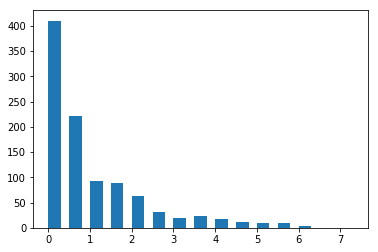

In [9]:
bins = np.arange(0,8,.5)
h = np.histogram(data, bins)
plt.bar(h[1][:-1],h[0],width=.3,align='edge')


## Manually, fit an exponential function to the histogram

<BarContainer object of 21 artists>

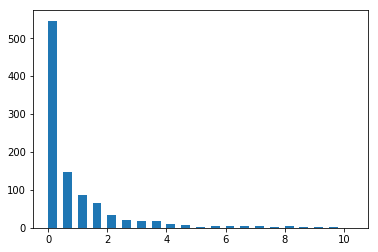

In [10]:
r = np.random.exponential(size=len(data))
bins = np.arange(0,11,.5)
h = np.histogram(data*r, bins)
plt.bar(h[1][:-1],h[0],width=.3,align='edge')


## Generate 1000 numbers under the exponential distribution and calculate goodness of fit statistic (compared to H-data) 

In [51]:
random = np.random.exponential(size=1000)

f_observed = random

N=len(f_observed)
f_expected = data

chi_2_obt = np.sum(((f_expected - f_observed)**2.0)/f_expected)
print 'chi_2_obt =',chi_2_obt

chi_2=stats.chi2.ppf(q=1.0-.05,df=N-1)
print 'chi_2 from table =', chi_2

if chi_2_obt>chi_2:
    print("We reject the hypothesis that the two distributions are similar with a condifence of 95%")
else:
    print("We assume the two distributions are similar with a confidence of 95%")
    

    

chi_2_obt = 9924.963595485739
chi_2 from table = 1073.6426506574246
we reject the hypothesis that the two distributions are similar with a condifence of 95%


## Generate another set of 1000 numbers using accept-reject under H_data graph, and calculate goodness of fit statistic (compared to H-data) 


In [41]:
j = 0
k = 0
random_data = np.random.exponential(size=1000)
for i in range(len(data)):
    if random_data[i]<data[i]:
        j = j + 1
    else:
        k = k + 1
print j,"numbers have been accepted"
print k,"numbers have been rejected"

518 numbers have been accepted
482 numbers have been rejected


## In your application, accuracy is more important than speed of computation. Which generator is the most suitable, and why? 

In [53]:
# exponential distribution

start = time.clock()

random = np.random.exponential(size=1000)

f_observed = random

N=len(f_observed)
f_expected = data

chi_2_obt = np.sum(((f_expected - f_observed)**2.0)/f_expected)
print 'chi_2_obt =',chi_2_obt

chi_2=stats.chi2.ppf(q=1.0-.05,df=N-1)
print 'chi_2 from table =', chi_2

if chi_2_obt>chi_2:
    print("we reject the hypothesis that the two distributions are similar with a condifence of 95%")
else:
    print("We assume the two distributions are similar with a confidence of 95%")

    
end = time.clock()
print (end-start), 'sec'



# accept-reject method

start = time.clock()

j = 0
k = 0
random_data = np.random.exponential(size=1000)
for i in range(len(data)):
    if random_data[i]<data[i]:
        j = j + 1
    else:
        k = k + 1
print j,"numbers have been accepted"
print k,"numbers have been rejected"

end = time.clock()
print (end-start), 'sec'
    

chi_2_obt = 9095.867905527608
chi_2 from table = 1073.6426506574246
we reject the hypothesis that the two distributions are similar with a condifence of 95%
0.00295316960614 sec
503 numbers have been accepted
497 numbers have been rejected
0.00382025546423 sec


### The accept-reject method is the fasther method